**Name:** <span> Eloi Vilella</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 2 (PART 1)
# Robustness of gene regulatory networks

---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aul@-ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

In this session we will study two publicly available biological networks. We will assess their robustness to attacks. To that end we will use the Python package `NetworkX`.

# 0. NetworkX instructions

These are the main `NetworkX` instructions that you will need to use in this practical:

*   `<graph>.to_undirected()` returns an undirected graph representation of the `<graph>` directed graph object. This allows to use some of the Networkx methods that only work with undirected graphs.

*   `<graph_copy> = <graph>.copy()` returns a copy of the `<graph>` graph object. 

*   `<graph>.number_of_nodes()` returns the number of nodes of the `<graph>` object.

*   `<graph>.number_of_edges()` returns the number of edges of the `<graph>` object.

*   `<graph>.nodes()` returns a list with all the nodes in `<graph>`.

*   `networkx.adjacency_matrix(<graph>)` creates the adjacency matrix of a network. The matrix is produced in the `SciPy` sparse format. You should use the `todense` method of this data type to generate a `numpy` matrix.

*   `networkx.number_connected_components(<graph>)` returns the number of connected components of the undirected graph `<graph>`.

*   `networkx.connected_component_subgraphs(<graph>)` returns a list of the connected components in the undirected graph `<graph>`. The components are ordered from the largest to the smallest. ***Use the function below if you receive an error here***
*   `<graph>.subgraph(c) for c in nx.connected_components(<graph>)` does the same as the function directly above. Use this if you receive an error when trying to use the function above.

*   `<graph>.remove_node(<node>)` removes the node with name `<node>` from the `<graph>` graph.
*   `networkx.draw_networkx` draws the network. It is convenient to use the `pos` argument with the `spring_layout` function of NetworkX to position the nodes such that the network is not too tangled.

First, load all necessary Python modules (including NetworkX).

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Network analysis

There is a large number of databases of cellular regulatory networks (involving metabolic reactions, protein-protein interactions, gene regulation, ...). In this practical session we will work with transcription factor networks, which can usually be treated as directed simple graphs. We will the **RegulonDB** database, which contains most known gene regulatory interactions in _Escherichia coli_. To download the database, access the [RegulonDB website](http://regulondb.ccg.unam.mx/), then click **Downloads** and then **Experimental Datasets**. Finally, download the file labeled **TF - gene interactions**, and place it in the folder where you will be working.

To load the network you can use the following function:

In [2]:
def load_network(file_path):
    file_object = open(file_path, mode="r")       # open the file in reading (r) mode
    network_object = nx.DiGraph()                 # Create a directed graph object
    
    for line in file_object:                      # For each line in the file
        if line.startswith("#") or line == "\n":  # skip the line if it starts with #, or
                                                  # if it's empty ()
            continue
        line = line.lower().split()               # remove uppercase letters and
                                                  # split the line into words
        network_object.add_edge(line[0], line[1]) # add an edge going from the node specified
                                                  # in the first column to the
                                                  # one specified in the second column
    return network_object

Load the database into a graph object and calculate the number of genes (nodes), interactions (edges) and the mean degree.

In [3]:

nw = load_network("network_tf_gene.txt")

num_genes = nw.number_of_nodes()
num_interactions = nw.number_of_edges()
mean_degree = sum(dict(nw.degree()).values()) / num_genes

print(f"Number of genes (nodes): {num_genes}")
print(f"Number of interactions (edges): {num_interactions}")
print(f"Mean degree: {mean_degree:.2f}")


Number of genes (nodes): 1909
Number of interactions (edges): 4439
Mean degree: 4.65


---

The code loads a network from a text file into a directed graph, then calculates and prints the number of nodes (genes), edges (interactions), and the mean degree (average connectivity per node).

---

How many _connected components_ (a set of vertices in a graph that are linked to each other by
paths) does the network have? Select the largest component of the network (save it to a new
graph) and repeat the calculations of number of nodes, number of edjes and mean degree. Draw this new subgraph.

In [4]:
u_nw=nw.to_undirected()
m_component=max(nx.connected_components(u_nw))
m_nw=nw.subgraph(m_component).to_undirected().copy()
safe_m_nw=m_nw.copy() #To use on a latter exercise

m_nodes=m_nw.number_of_nodes()
m_edges=m_nw.number_of_edges()
m_mdegree=(2*m_edges)/m_nodes

print(f"Nodes: {m_nodes}\nEdges: {m_edges}\nMean degree: {m_mdegree}")

plt.figure(figsize=(16, 16)) 


Nodes: 1802
Edges: 4328
Mean degree: 4.803551609322975


<Figure size 1600x1600 with 0 Axes>

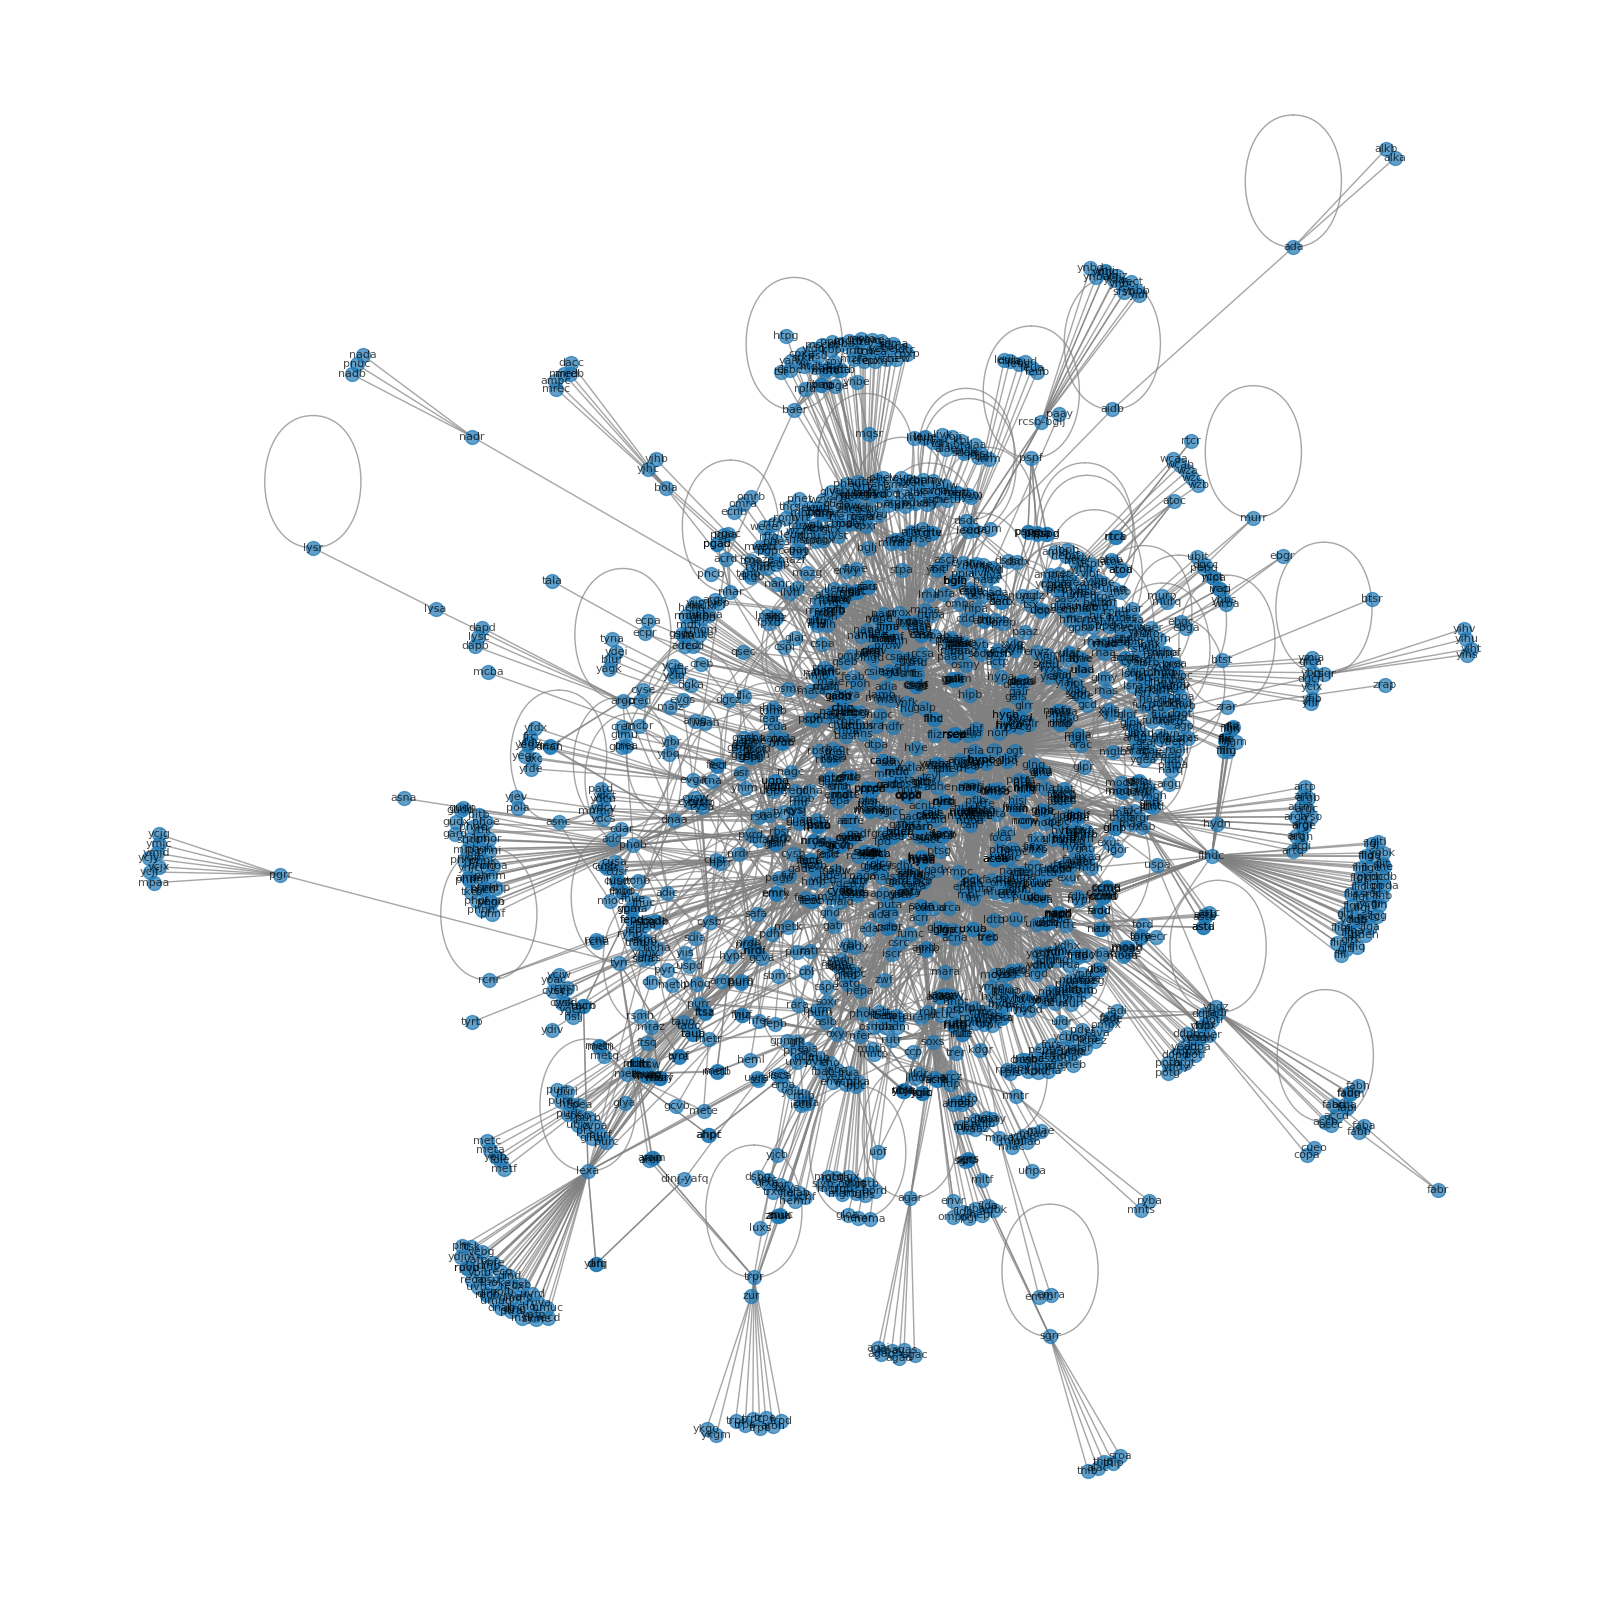

In [5]:
nx.draw(m_nw, node_size=100, font_size=8, alpha=0.7, with_labels=True, edge_color="gray")
plt.show()

---

The code loads a directed graph from a file, calculates the number of weakly connected components, extracts the largest component, computes its number of nodes, edges, and mean degree, and then visualizes this subgraph.

---

Next, create the adjacency matrix of the network, and use it to compute the degrees of all nodes and the average degree of the network. Print the average degree and plot the degree distribution of the network **(do NOT use specially dedicated functions of NetworkX for those tasks)**.

Average degree of the network: 2.33


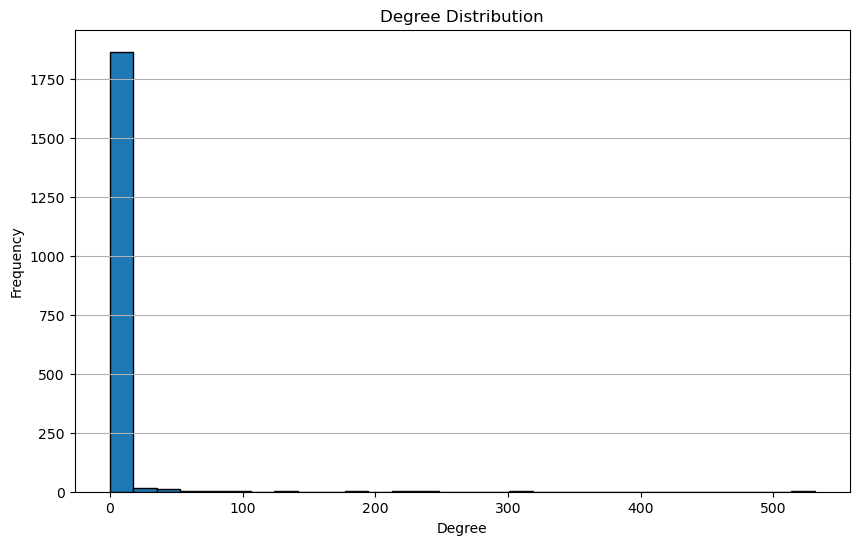

In [6]:
adjacency_matrix = nx.to_numpy_array(nw)

degrees = np.sum(adjacency_matrix, axis=1)
average_degree = np.mean(degrees)
print(f"Average degree of the network: {average_degree:.2f}")

plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=30, edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


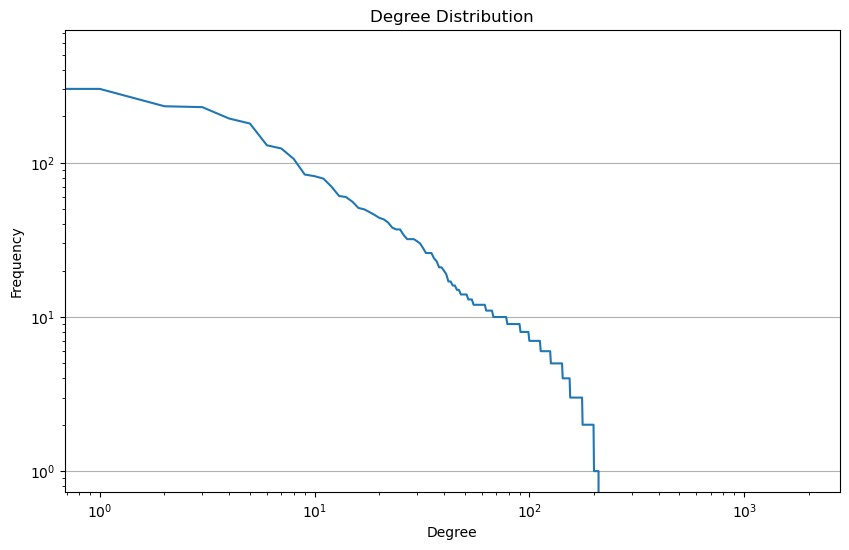

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(sorted(degrees, reverse= True))
plt.xscale("log")
plt.yscale("log")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()


---
The code creates an adjacency matrix for the directed graph, we compute the degrees of all nodes and the average degree of the network using NumPy, and then we plot the degree distribution as a histogram and as a log scale plot.
---

# 2. Robustness to failures

Different classes of networks react in different ways when some of their nodes disappear. Here we will study the robustness to random failures **using only the largest connected component of the RegulonDB network**. To do so, copy the largest connected component of the network into a new graph. Next remove iteratively 20 arbitrary (i.e. randomly chosen) nodes from this graph and check if its connectivity has changed: does it remain as a single connected component or does the failure break it apart into multiple sub-graphs?

**Note**: to select a random node use the function `randint` from the module `numpy.random`.

In [9]:
m_nw=safe_m_nw.copy()
np.random.seed(1)

def rm_20(i):
    if i==0:
        return

    nodelist = list(m_nw.nodes)
    n = np.random.randint(0, len(nodelist)) 
    m_nw.remove_node(nodelist[n])

    return rm_20(i-1)

rm_20(20)


In [10]:
print(f"The numbers of nodes should be {m_nodes-20}, and is: {m_nw.number_of_nodes()}" )
print("The graph is connected:", nx.is_connected(m_nw))

The numbers of nodes should be 1782, and is: 1782
The graph is connected: True


---

The graph stays connected despite removing 20 nodes, with many nodes having very few connections. Hence, it's likely that the removed nodes had low degrees. A low degree indicates fewer connections, suggesting these nodes may not be crucial, as alternative connections likely exist in the graph.

---

# 3. Sensitivity to attacks

We now study the effect of directed attacks, namely removal of the most important nodes of the network, and see how they affect its connectivity. Although there is a variety of ways to measure the importance of a node, for the sake of simplicity we will restrict ourselves to using the degree.

Using the `sorted` function in Python, list the 10 nodes with highest degree.

In [11]:
def top_degree_finder(network):
    deg_dict=dict(network.degree()) 
    deg_as_key = dict(zip(deg_dict.values(), deg_dict.keys()))
    high_degrees=sorted(deg_as_key.keys(), reverse=True)[:10] 

    return [deg_as_key, high_degrees] 

[deg_as_key, high_degrees]=top_degree_finder(nw)
c=1
for deg in high_degrees: 
    print("The node",deg_as_key[deg],"is ranked number",c)
    c+=1

The node crp is ranked number 1
The node fnr is ranked number 2
The node fis is ranked number 3
The node ihf is ranked number 4
The node h-ns is ranked number 5
The node arca is ranked number 6
The node fur is ranked number 7
The node narl is ranked number 8
The node lrp is ranked number 9
The node nsrr is ranked number 10


Generate a new copy of the largest component of the network as you did above. Remove iteratively the 10 nodes with highest degree of the network and check how the connectivity changes.

In [12]:
m_nw=safe_m_nw.copy()

[deg_as_key, high_degrees]=top_degree_finder(m_nw)

for deg in high_degrees: 
    m_nw.remove_node(deg_as_key[deg]) 

print(f"The numbers of nodes should be {m_nodes-10}, and is: {m_nw.number_of_nodes()}" )
print("The graph is connected:", nx.is_connected(m_nw))

The numbers of nodes should be 1792, and is: 1792
The graph is connected: False


---

Removing the nodes with the highest degrees causes the graph’s connectivity to fail. Previously, the nodes removed had alternative paths, allowing the graph to stay connected. However, removing a key node increases the chance that one of its connections lacks an alternative, leading to a breakdown in connectivity.

---